In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [8]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [27]:
superbat = cast.copy()
superbat['hero'] = 0
is_batman = superbat.title.str.contains("Batman")
is_superman = superbat.title.str.contains("Superman")
superbat = superbat[is_batman | is_superman]
superbat.loc[is_batman, 'hero'] += 1 
superbat.loc[is_superman, 'hero'] -= 1
# remove characters playing in a movie in which both superman and batman can be found: hero value = 0:
superbat = superbat[superbat.hero != 0]
gb = superbat.groupby(['year', 'hero'])
df = gb.size().unstack()
df.fillna(0) # NaN (no movie with that hero at a given year) replaced by 0
print "number of Superman years : {}".format(len(df[df[-1] > df[1]]))
print df[df[-1] > df[1]]

number of Superman years : 1
hero    -1    1
year           
1973  41.0  5.0


In [52]:
superbat = cast.copy()
is_batman = superbat.character == "Superman"
is_superman = superbat.character == "Batman"
superbat = superbat[is_batman | is_superman]
gb = superbat.groupby(['year', 'character'])
df = gb.size().unstack('character')
df = df.fillna(0)
print "number of superman years : {}".format(len(df[df.Superman > df.Batman]))
df[df.Superman > df.Batman]

number of superman years : 13


character,Batman,Superman
year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0
1973,1.0,2.0
1978,0.0,2.0
1980,0.0,2.0
1983,0.0,2.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [36]:
df[df.Superman < df.Batman]

character,Batman,Superman
year,,
2008,3.0,2.0
2009,3.0,1.0
2011,4.0,2.0
2013,4.0,1.0
2014,4.0,1.0
2015,3.0,1.0
2016,11.0,4.0


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

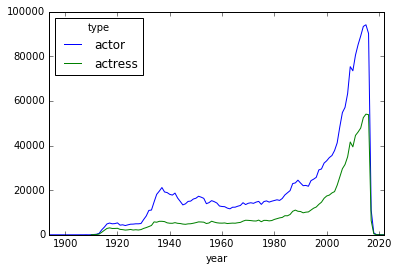

In [11]:
gb = cast.groupby(['year', 'type'])
gb.size().unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

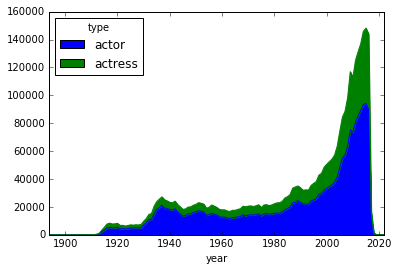

In [12]:
gb = cast.groupby(['year', 'type'])
gb.size().unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

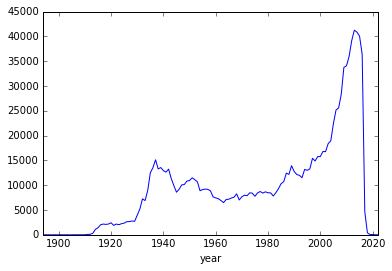

In [15]:
gb = cast.groupby(['year', 'type'])
df_type = gb.size().unstack().fillna(0)
(df_type.actor - df_type.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

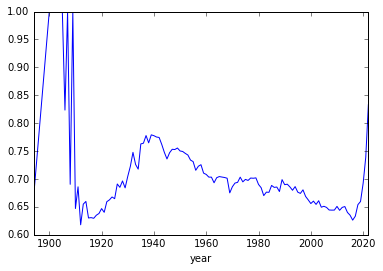

In [16]:
gb = cast.groupby(['year', 'type'])
df_type = gb.size().unstack().fillna(0)
(df_type.actor / (df_type.actor + df_type.actress) ).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

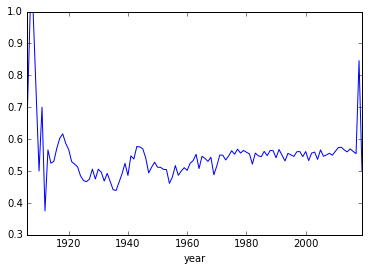

In [17]:
is_supporting = cast['n'] == 2
gb = cast[is_supporting].groupby(['year', 'type'])
df_type = gb.size().unstack().fillna(0)
(df_type.actor / (df_type.actor + df_type.actress) ).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

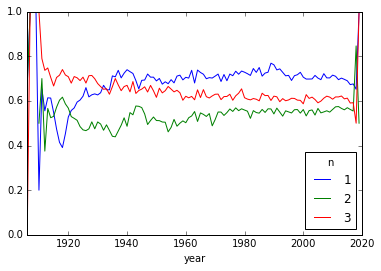

In [42]:
n_1_3 = (cast.n >= 1) & (cast.n <= 3)
gb = cast[n_1_3].groupby(['year', 'type', 'n'])
df = gb.size().unstack('n').unstack('type').fillna(0)
diff_1 = df[1].actor/(df[1].actor+df[1].actress)
diff_2 = df[2].actor/(df[2].actor+df[2].actress)
diff_3 = df[3].actor/(df[3].actor+df[3].actress)
result = pd.concat([diff_1, diff_2, diff_3], axis=1)
result.columns = [1, 2, 3]
result.columns.name = 'n'
result.plot()